In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from tensorflow import keras

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

In [2]:
digits = datasets.load_digits(n_class=6)

In [3]:
X = digits.data
y = digits.target

In [4]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(16, 12))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Set1(y[i] / 10.),
            fontdict={'weight': 'bold', 'size': 9}
        )

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [5]:
n_samples, n_features = X.shape
n_neighbors = 30

In [6]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

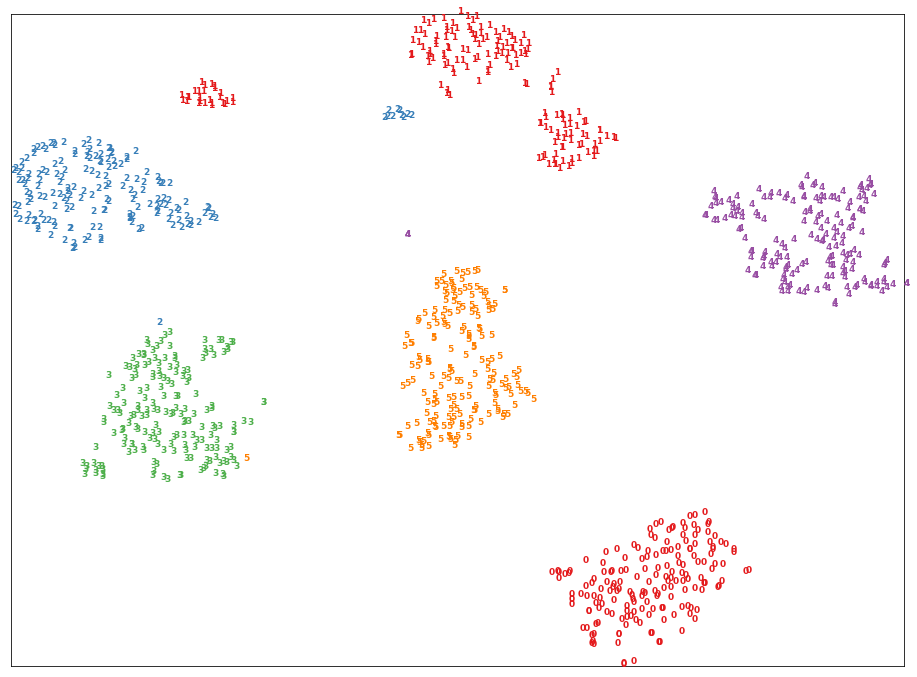

In [7]:
plot_embedding(X_tsne, y)

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
img_len, width, height = train_images.shape

In [10]:
train_images_examples = np.empty((0, width * height), int)
train_labels_examples = np.empty(0, int)

flattened_images = train_images.reshape(img_len, width * height)

labels = np.unique(train_labels)

for label in labels:
    label_indexes = np.where(train_labels == label)[0][:1000]
    train_labels_examples = np.append(train_labels_examples, train_labels[label_indexes])
    train_images_examples = np.vstack((train_images_examples, flattened_images[label_indexes]))

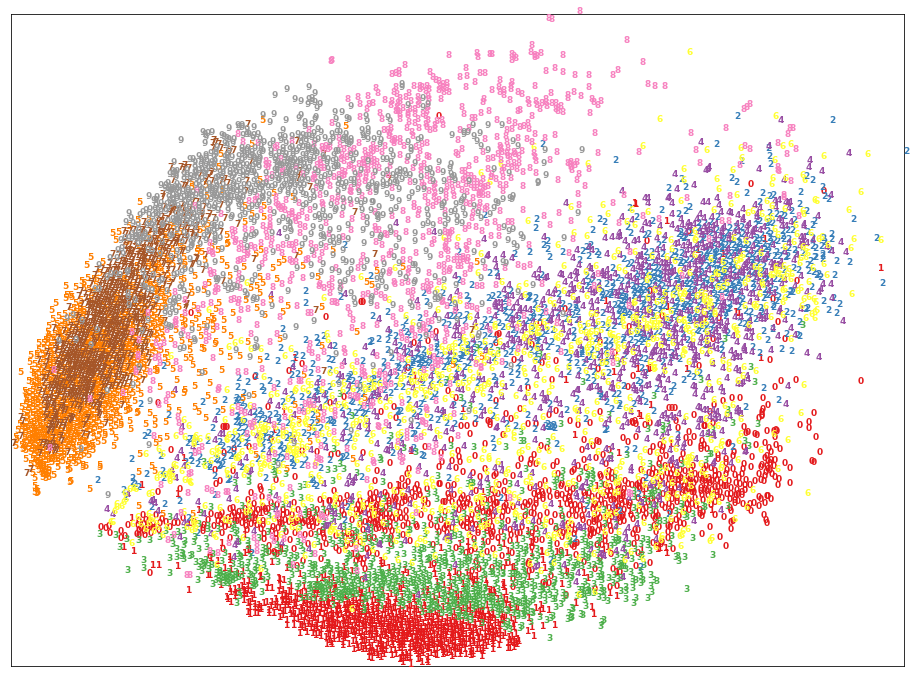

In [11]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
train_images_examples_tsne = tsne.fit_transform(train_images_examples)
plot_embedding(train_images_examples_tsne, train_labels_examples)

In [12]:
# rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
# train_images_examples_rp = rp.fit_transform(train_images_examples)
# plot_embedding(train_images_examples_rp, train_labels_examples)

In [13]:
# X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(train_images_examples)
# plot_embedding(X_pca, train_labels_examples)

In [14]:
# train_images_examples2 = train_images_examples.copy().astype('float64') 
# train_images_examples2.flat[::train_images_examples.shape[1] + 1] += 0.01  # Make X invertible
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2
#                                                          ).fit_transform(
#     train_images_examples2,
#     train_labels_examples
# )
# plot_embedding(X_lda, train_labels_examples)

In [15]:
# X_iso = manifold.Isomap(
#     n_neighbors=n_neighbors,
#     n_components=2
# ).fit_transform(train_images_examples)

# plot_embedding(
#     X_iso,
#     train_labels_examples
# )

In [16]:
# clf = manifold.LocallyLinearEmbedding(
#     n_neighbors=n_neighbors,
#     n_components=2,
#     method='standard'
# )

# X_lle = clf.fit_transform(train_images_examples)

# plot_embedding(
#     X_lle,
#     train_labels_examples
# )

In [17]:
# clf = manifold.LocallyLinearEmbedding(
#     n_neighbors=n_neighbors,
#     n_components=2,
#     method='modified'
# )

# X_mlle = clf.fit_transform(train_images_examples)

# plot_embedding(
#     X_mlle,
#     train_labels_examples
# )

In [18]:
# clf = manifold.LocallyLinearEmbedding(
#     n_neighbors=n_neighbors,
#     n_components=2,
#     method='hessian'
# )

# X_hlle = clf.fit_transform(train_images_examples)

# plot_embedding(
#     X_hlle,
#     train_labels_examples)

In [19]:
# clf = manifold.LocallyLinearEmbedding(
#   n_neighbors=n_neighbors,
#   n_components=2,
#   method='ltsa'
# )

# X_ltsa = clf.fit_transform(train_images_examples)

# plot_embedding(
#   X_ltsa,
#   train_labels_examples
# )

In [20]:
# clf = manifold.MDS(
#   n_components=2,
#   n_init=1,
#   max_iter=100
# )

# X_mds = clf.fit_transform(train_images_examples)

# plot_embedding(X_mds,
#                train_labels_examples)

In [21]:
# hasher = ensemble.RandomTreesEmbedding(
#   n_estimators=200,
#   random_state=0,
#   max_depth=5
# )

# X_transformed = hasher.fit_transform(train_images_examples)
# pca = decomposition.TruncatedSVD(n_components=2)
# X_reduced = pca.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                train_labels_examples)

In [22]:
# embedder = manifold.SpectralEmbedding(
#   n_components=2,
#   random_state=0,
#   eigen_solver="arpack"
# )

# X_se = embedder.fit_transform(train_images_examples)

# plot_embedding(X_se,
#                train_labels_examples)

In [23]:
# tsne = manifold.TSNE(
#   n_components=2,
#   init='pca',
#   random_state=0
# )

# X_tsne = tsne.fit_transform(train_images_examples)

# plot_embedding(X_tsne,
#                train_labels_examples)

In [24]:
# nca = neighbors.NeighborhoodComponentsAnalysis(
#   init='random',
#   n_components=2,
#   random_state=0
# )

# X_nca = nca.fit_transform(train_images_examples, train_labels_examples)

# plot_embedding(X_nca,
#                train_labels_examples)